In [3]:
import pandas as pd
import numpy as np

In [4]:
calls_dataset = pd.read_csv('dataset/calls.csv')
customer_dataset= pd.read_csv('dataset/customers.csv')
reason_dataset= pd.read_csv('dataset/reason.csv')
sentiment_dataset= pd.read_csv('dataset/sentiment_statistics.csv')

In [5]:
call_reason_dataset= pd.merge(calls_dataset,reason_dataset, on=('call_id') ,how=('left'))
call_reason_dataset

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating
...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Post Flight
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Upgrade
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Upgrade
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,NaN


In [6]:
call_sentiment_dataset= pd.merge(sentiment_dataset, call_reason_dataset, on=('call_id'), how=('left'))
call_sentiment_dataset.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason
0,4667960400,963118,neutral,angry,-0.04,0.39,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel
1,1122072124,519057,calm,neutral,0.02,0.35,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking
2,6834291559,158319,neutral,polite,-0.13,0.32,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS
3,2266439882,488324,neutral,frustrated,-0.20,0.20,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade
4,1211603231,721730,neutral,polite,-0.05,0.35,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating


In [7]:
main_dataset= pd.merge(call_sentiment_dataset, customer_dataset, on=('customer_id'), how=('left'))
main_dataset.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code
0,4667960400,963118,neutral,angry,-0.04,0.39,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Matthew Foster,4.0
1,1122072124,519057,calm,neutral,0.02,0.35,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking,Tammy Walters,NaN
2,6834291559,158319,neutral,polite,-0.13,0.32,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Jeffery Dixon,NaN
3,2266439882,488324,neutral,frustrated,-0.20,0.20,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade,David Wilkins,2.0
4,1211603231,721730,neutral,polite,-0.05,0.35,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating,Elizabeth Daniels,0.0


In [8]:
main_dataset.isnull().sum()

call_id                        0
agent_id_x                     0
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
customer_id                    0
agent_id_y                     0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
primary_call_reason         5157
customer_name                  0
elite_level_code           25767
dtype: int64

In [9]:
main_dataset['elite_level_code'].fillna(0, inplace=True)
main_dataset['agent_tone'].fillna('neutral', inplace=True)
main_dataset['average_sentiment'].fillna(main_dataset['average_sentiment'].mean(), inplace=True)
main_dataset.isnull().sum()

call_id                       0
agent_id_x                    0
agent_tone                    0
customer_tone                 0
average_sentiment             0
silence_percent_average       0
customer_id                   0
agent_id_y                    0
call_start_datetime           0
agent_assigned_datetime       0
call_end_datetime             0
call_transcript               0
primary_call_reason        5157
customer_name                 0
elite_level_code              0
dtype: int64

In [10]:
main_dataset['call_start_datetime']= pd.to_datetime(main_dataset['call_start_datetime'])
main_dataset['call_end_datetime']= pd.to_datetime(main_dataset['call_end_datetime'])
main_dataset['agent_assigned_datetime']= pd.to_datetime(main_dataset['agent_assigned_datetime'])

In [11]:
main_dataset['handle_time']= (main_dataset['call_end_datetime']- main_dataset['agent_assigned_datetime']).dt.total_seconds()
main_dataset['allocation_time']= (main_dataset['agent_assigned_datetime']- main_dataset['call_start_datetime']).dt.total_seconds()
main_dataset.drop('agent_id_y', axis=1, inplace=True)

In [12]:
aht = main_dataset['handle_time'].mean()
ast = main_dataset['allocation_time'].mean()
print(f"Average Handle Time (AHT): {aht//60} min")
print(f"Average Speed to Answer (AST): {ast//60} min")

Average Handle Time (AHT): 11.0 min
Average Speed to Answer (AST): 7.0 min


In [13]:
import re
main_dataset['primary_call_reason'].fillna('Unknown Reason', inplace=True)
main_dataset.isnull().sum() # preprocessing completed
main_dataset['primary_call_reason'].value_counts()
def clean_reason(reason):
    reason = re.sub(r'\s+', ' ', reason)  # Replace multiple spaces with a single space
    reason = reason.strip()  # Remove leading and trailing spaces
    return reason.lower() 

main_dataset['primary_call_reason'] = main_dataset['primary_call_reason'].apply(clean_reason)

# Check for unique call reasons after cleaning
unique_reasons = main_dataset['primary_call_reason'].unique()
print(unique_reasons)

# Get value counts of cleaned call reasons
reason_counts = main_dataset['primary_call_reason'].value_counts()
print(reason_counts)

# Check for any remaining null values
print(main_dataset.isnull().sum())

# def remove_spaces(reason):
#     reason = re.sub(r'\s+', ' ', reason)
#     reason = reason.strip()  # Remove leading/trailing spaces
#     return reason.lower() 
    # words= reason.split()
    # final_value= ""

    # for i in words:
    #     i.strip()
    #     if(final_value!= ""):
    #         if(i!= " "):
    #             final_value = final_value + " " + i
    #     else:
    #         final_value= i

# main_dataset['primary_call_reason'].apply(remove_spaces)
(main_dataset['primary_call_reason'].unique())

['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' 'unknown reason' 'voluntary change' 'post flight' 'check in'
 'other topics' 'communications' 'schedule change' 'products & services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc' 'post-flight' 'check-in' 'products and services']
primary_call_reason
irrops                   13311
voluntary change         10848
seating                   6365
mileage plus              5851
unknown reason            5157
post-flight               3957
communications            3840
products and services     2856
baggage                   2832
upgrade                   2738
booking                   2637
checkout                  1888
voluntary cancel          1607
check-in                  1519
digital support           1225
etc                        952
traveler updates           937
other topics               818
schedule change            731
products & services        476


array(['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating',
       'mileage plus', 'checkout', 'unknown reason', 'voluntary change',
       'post flight', 'check in', 'other topics', 'communications',
       'schedule change', 'products & services', 'digital support',
       'disability', 'unaccompanied minor', 'baggage', 'traveler updates',
       'etc', 'post-flight', 'check-in', 'products and services'],
      dtype=object)

[394.39588689 626.49969605 617.06840391 748.11727749 220.        ]


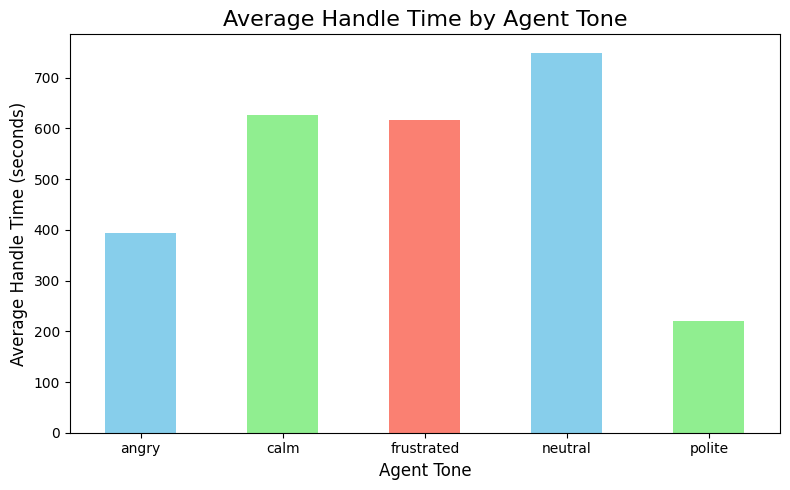

In [14]:
import matplotlib.pyplot as plt
avg_handle_time_by_agent_tone = main_dataset.groupby('agent_tone')['handle_time'].mean()
print(avg_handle_time_by_agent_tone.values)
plt.figure(figsize=(8, 5))
avg_handle_time_by_agent_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Agent Tone', fontsize=16)
plt.xlabel('Agent Tone', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

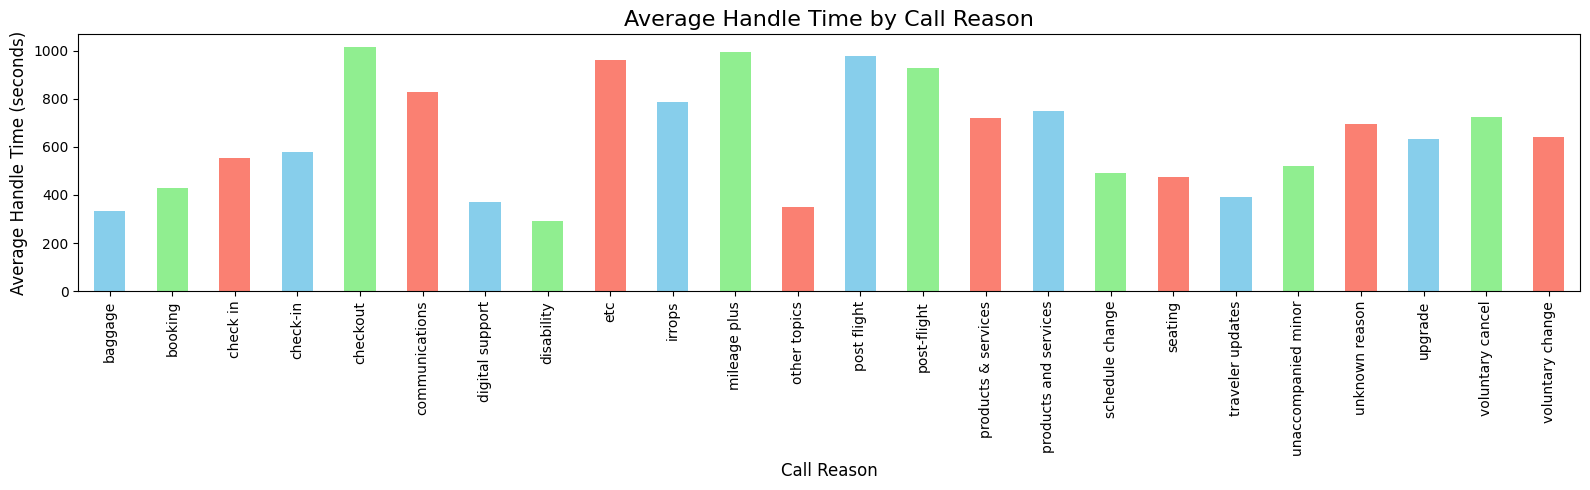

In [15]:
avg_handle_time_by_reason= main_dataset.groupby('primary_call_reason')['handle_time'].mean()
plt.figure(figsize=(16, 5))
avg_handle_time_by_reason.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Call Reason', fontsize=16)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
# Call frequency analysis for primary call reasons
call_reason_freq = main_dataset['primary_call_reason'].value_counts()

# Most frequent and least frequent reasons
most_frequent_reason = call_reason_freq.idxmax()
least_frequent_reason = call_reason_freq.idxmin()

print('most frequent reason', most_frequent_reason)
print('least freuent reason', least_frequent_reason)

most frequent reason irrops
least freuent reason unaccompanied minor


In [17]:
# Calculate AHT for most and least frequent reasons
most_frequent_aht = main_dataset[main_dataset['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
least_frequent_aht = main_dataset[main_dataset['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()
print(most_frequent_aht)
print(least_frequent_aht)

# Calculate percentage difference
percentage_diff = ((most_frequent_aht - least_frequent_aht) / least_frequent_aht) * 100
print(f"Percentage difference in AHT between most and least frequent call reasons: {percentage_diff:.2f}%")

785.1160694162722
519.2307692307693
Percentage difference in AHT between most and least frequent call reasons: 51.21%


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Analyze call transcripts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(main_dataset['call_transcript'].fillna(''))
features = vectorizer.get_feature_names_out()

# Summarize most common issues
common_issues = X.sum(axis=0).A1
issue_df = pd.DataFrame(common_issues, index=features, columns=['Count'])
top_issues = issue_df.nlargest(10, 'Count')
print(top_issues)
main_dataset['call_transcript'].value_counts()

           Count
flight    631962
agent     555458
customer  549932
let       310728
change    248693
help      201067
like      194177
thank     184727
united    173306
calling   159962


call_transcript
\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.\n\nCustomer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. \n\nAgent: I understand your frustration sir, delays are never fun. Let me see what options I have av

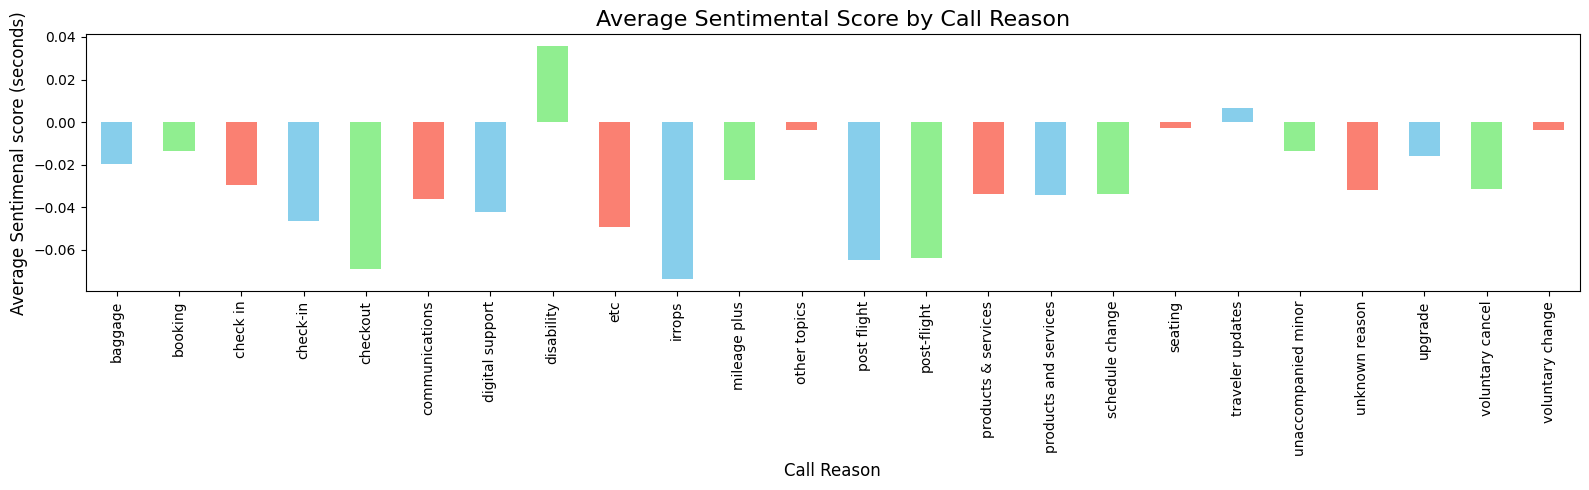

In [19]:
avg_sentimental_score_by_reason= main_dataset.groupby('primary_call_reason')['average_sentiment'].mean()
plt.figure(figsize=(16, 5))
avg_sentimental_score_by_reason.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Sentimental Score by Call Reason', fontsize=16)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Average Sentimenal score (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

    hour  handle_time
0      0   682.545772
1      1   757.087034
2      2   703.973384
3      3   706.529467
4      4   688.331762
5      5   691.630435
6      6   698.277778
7      7   698.502475
8      8   703.986916
9      9   712.512686
10    10   692.383151
11    11   683.592677
12    12   691.796610
13    13   700.890093
14    14   690.381209
15    15   695.198765
16    16   687.263339
17    17   695.834768
18    18   719.538757
19    19   682.594595
20    20   658.946444
21    21   685.877034
22    22   717.600000
23    23   672.707775


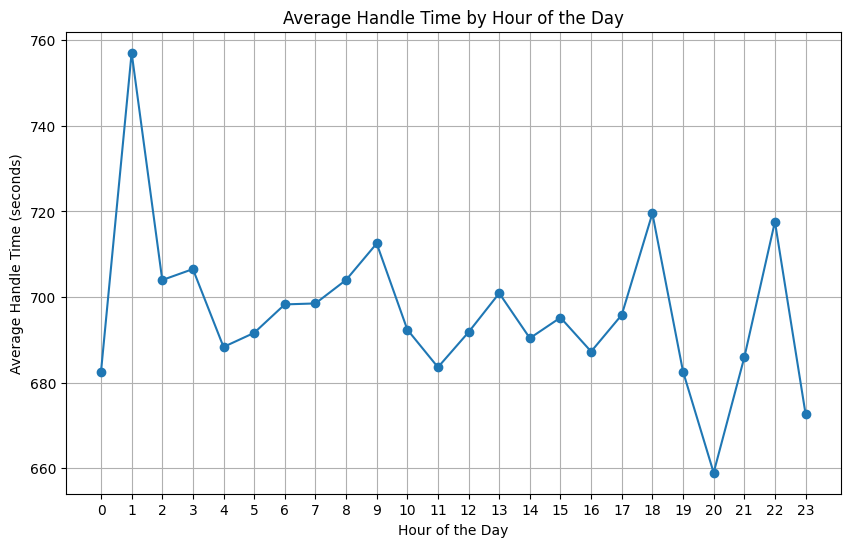

In [20]:
main_dataset['hour'] = main_dataset['call_start_datetime'].dt.hour

# Calculate average handle time per hour
avg_handle_time_per_hour = main_dataset.groupby('hour')['handle_time'].mean().reset_index()
print(avg_handle_time_per_hour)
plt.figure(figsize=(10, 6))
plt.plot(avg_handle_time_per_hour['hour'], avg_handle_time_per_hour['handle_time'], marker='o')
plt.title('Average Handle Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Handle Time (seconds)')
plt.xticks(avg_handle_time_per_hour['hour'])  # Set x-ticks to be the hours
plt.grid()
plt.show()

    hour  call_id  allocation_time
0      0     1147       438.831735
1      1     1126       432.362345
2      2     1052       436.825095
3      3     1069       440.823199
4      4     1061       430.235627
5      5     1104       438.423913
6      6     1080       431.111111
7      7     1616       450.259901
8      8     5197       440.781220
9      9     5321       438.616801
10    10     5199       436.376226
11    11     5244       436.029748
12    12     5310       438.881356
13    13     5168       433.966718
14    14     5194       438.413554
15    15     5182       435.549981
16    16     5229       435.949512
17    17     5229       438.347676
18    18     4683       433.709161
19    19     1110       446.270270
20    20     1139       437.436348
21    21     1106       439.638336
22    22     1125       428.586667
23    23     1119       428.203753


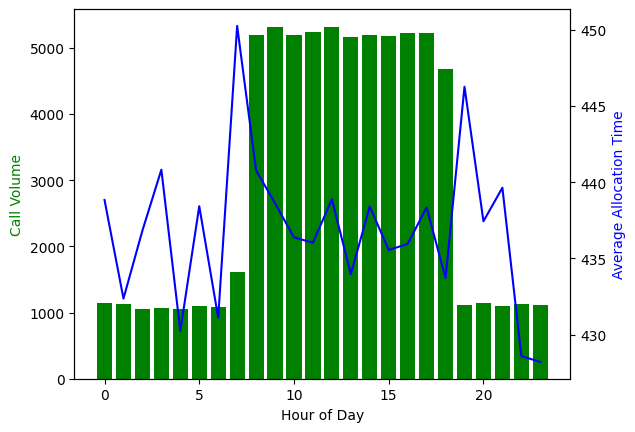

In [21]:
# Convert to datetime and extract hour/day for analysis
# Group by hour to see call volume trends
hourly_calls = main_dataset.groupby('hour').agg({
    'call_id': 'count',  # Call Volume
    'allocation_time':'mean'
}).reset_index()

print(hourly_calls)

# Visualize call volume and AHT across hours
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(hourly_calls['hour'], hourly_calls['call_id'], color='g')
ax2.plot(hourly_calls['hour'],hourly_calls['allocation_time'],color= 'b')

ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Call Volume', color='g')
ax2.set_ylabel('Average Allocation Time', color='b')

plt.show()


In [22]:
average_sentiment_by_agent_tone= main_dataset.groupby('agent_tone')['average_sentiment'].mean()

In [23]:
average_sentiment_by_hour= main_dataset.groupby('hour')['average_sentiment'].mean().reset_index()
average_sentiment_by_hour
# average_sentiment_by_hour.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
# plt.title('Average Sentimental Score by Hour of the Day', fontsize=16)
# plt.xlabel('Hour of the day', fontsize=12)
# plt.ylabel('Average Sentimenal score', fontsize=12)
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

,hour,average_sentiment
0,0,-0.036295
1,1,-0.028292
2,2,-0.032684
3,3,-0.025788
4,4,-0.038515
5,5,-0.031272
6,6,-0.031275
7,7,-0.035097
8,8,-0.030506
9,9,-0.034789


customer_tone
angry         695.530261
calm          699.604098
frustrated    692.738764
neutral       707.625312
polite        689.659731
Name: handle_time, dtype: float64


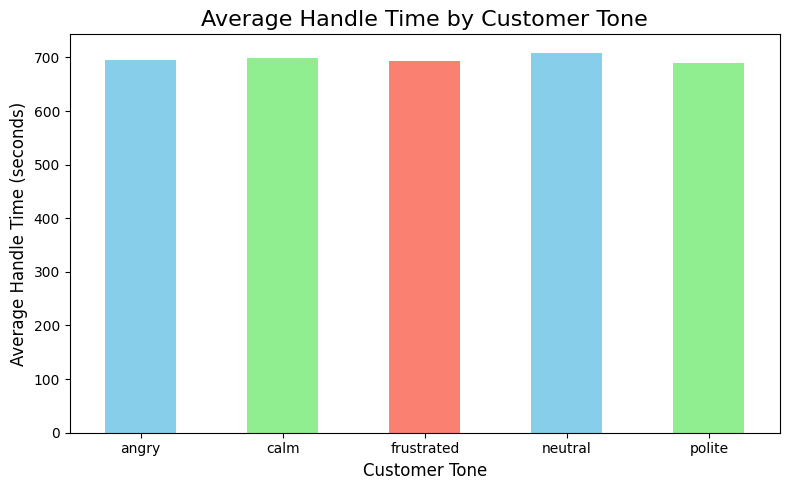

In [24]:
avg_handle_time_by_customer_tone = main_dataset.groupby('customer_tone')['handle_time'].mean()
print(avg_handle_time_by_customer_tone)
plt.figure(figsize=(8, 5))
avg_handle_time_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

customer_tone
angry         695.530261
calm          699.604098
frustrated    692.738764
neutral       707.625312
polite        689.659731
Name: handle_time, dtype: float64


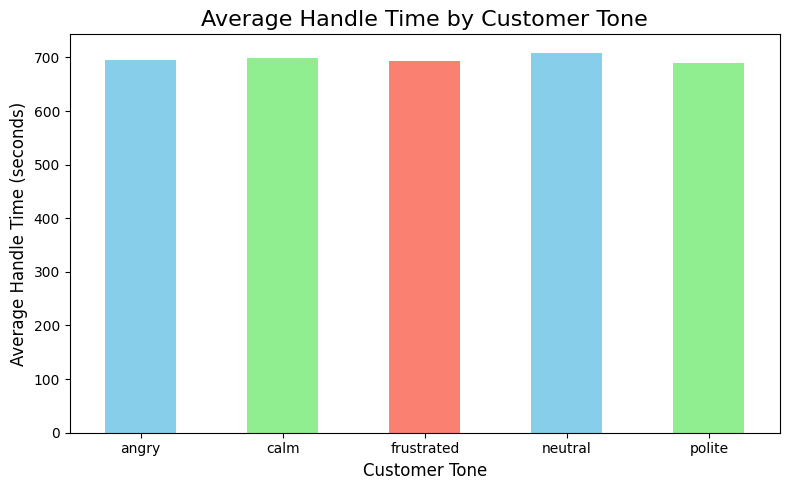

In [25]:
avg_handle_time_by_customer_tone = main_dataset.groupby('customer_tone')['handle_time'].mean()
print(avg_handle_time_by_customer_tone)
plt.figure(figsize=(8, 5))
avg_handle_time_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
print(main_dataset['average_sentiment'].max())
print(main_dataset['average_sentiment'].min())

2.67
-1.38


elite_level_code
0.0    678.143149
1.0    688.371608
2.0    726.449925
3.0    727.510460
4.0    788.244706
5.0    896.950608
Name: handle_time, dtype: float64


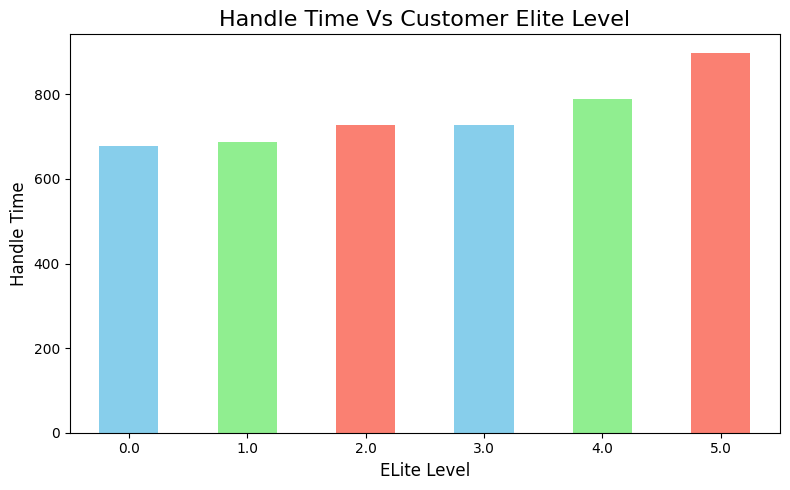

In [27]:
avg_handle_time_by_elite_level= main_dataset.groupby('elite_level_code')['handle_time'].mean()
print(avg_handle_time_by_elite_level)
plt.figure(figsize=(8, 5))
avg_handle_time_by_elite_level.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Handle Time Vs Customer Elite Level', fontsize=16)
plt.xlabel('ELite Level', fontsize=12)
plt.ylabel('Handle Time', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

customer_tone
angry         0.871321
calm          0.868335
frustrated    0.877739
neutral       0.890820
polite        0.886577
Name: elite_level_code, dtype: float64


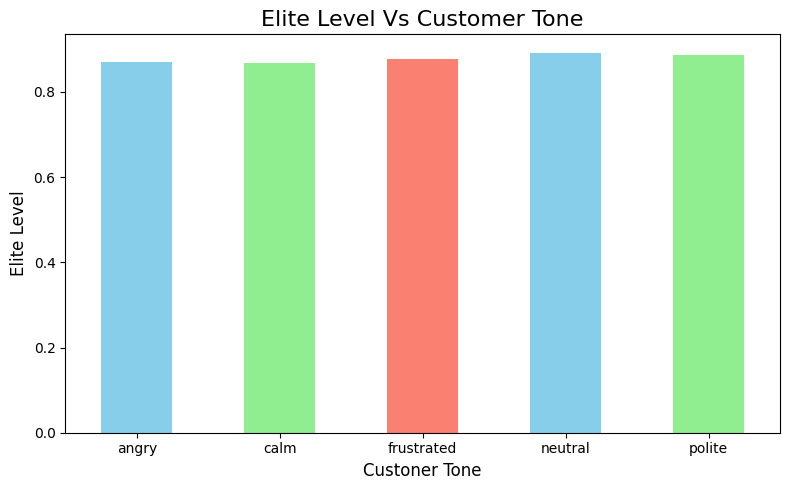

In [28]:
avg_elite_level_by_customer_tone= main_dataset.groupby('customer_tone')['elite_level_code'].mean()
print(avg_elite_level_by_customer_tone)
plt.figure(figsize=(8, 5))
avg_elite_level_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Elite Level Vs Customer Tone', fontsize=16)
plt.xlabel('Custoner Tone', fontsize=12)
plt.ylabel('Elite Level', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

agent_tone
angry         0.912596
calm          0.879595
frustrated    0.812975
neutral       0.884444
polite        0.643678
Name: elite_level_code, dtype: float64


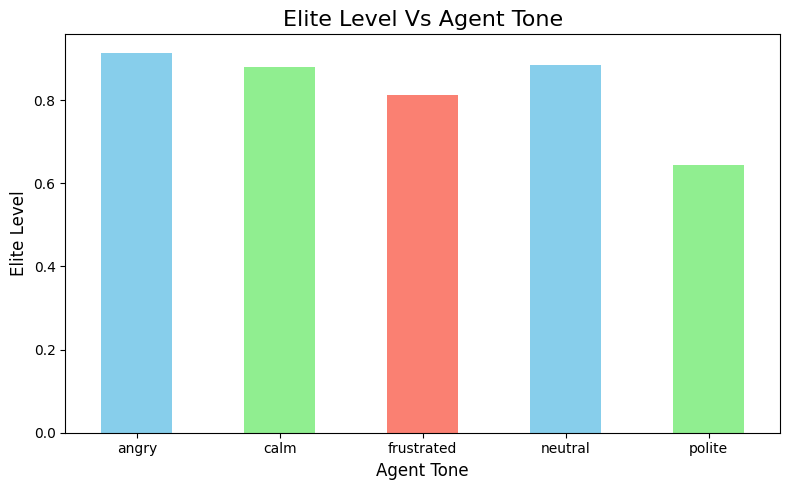

In [29]:
avg_elite_level_by_agent_tone= main_dataset.groupby('agent_tone')['elite_level_code'].mean()
print(avg_elite_level_by_agent_tone)
plt.figure(figsize=(8, 5))
avg_elite_level_by_agent_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Elite Level Vs Agent Tone', fontsize=16)
plt.xlabel('Agent Tone', fontsize=12)
plt.ylabel('Elite Level', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

customer_tone
angry         0.18
calm          0.15
frustrated    0.10
neutral       0.10
polite        0.16
Name: silence_percent_average, dtype: float64


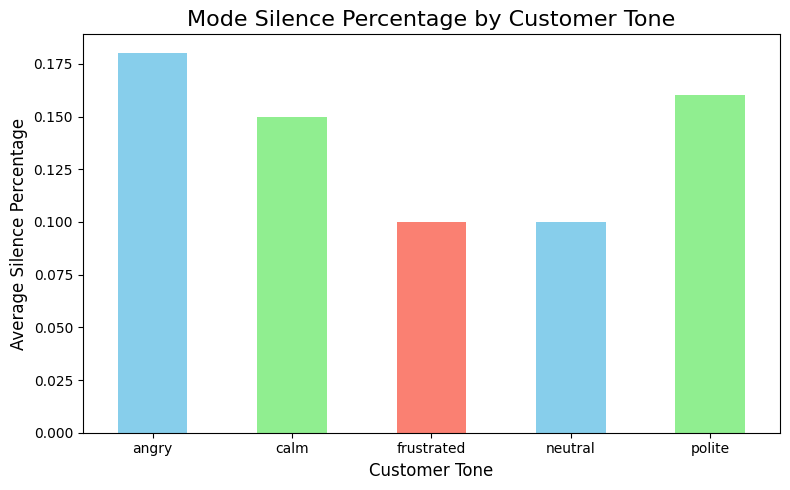

In [30]:
avg_handle_time_by_customer_tone_mode = main_dataset.groupby('customer_tone')['silence_percent_average'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print(avg_handle_time_by_customer_tone_mode)
plt.figure(figsize=(8, 5))
avg_handle_time_by_customer_tone_mode.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Mode Silence Percentage by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

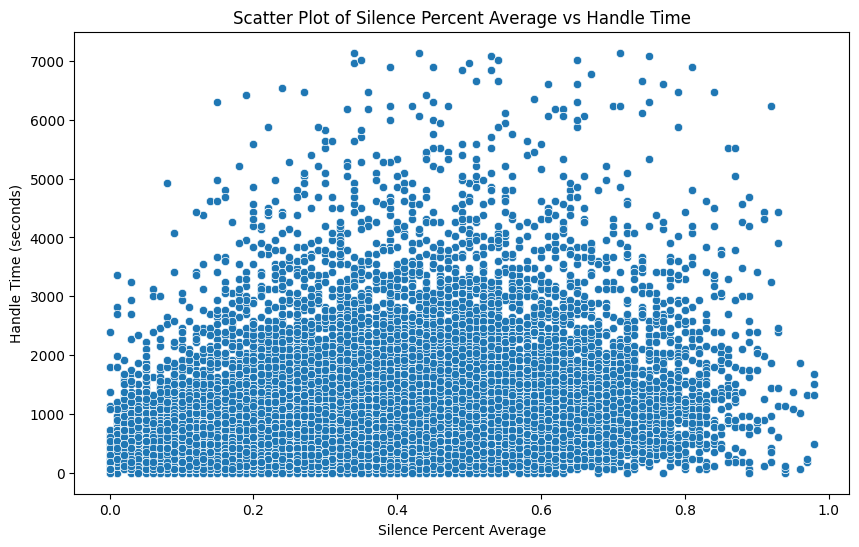

In [31]:
import seaborn as sns

# Assuming you have a DataFrame `main_dataset` with columns 'silence_percent_average' and 'handle_time'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=main_dataset, x='silence_percent_average', y='handle_time')
plt.title('Scatter Plot of Silence Percent Average vs Handle Time')
plt.xlabel('Silence Percent Average')
plt.ylabel('Handle Time (seconds)')
plt.show()

customer_tone
angry         0.286450
calm          0.284908
frustrated    0.283494
neutral       0.288883
polite        0.283799
Name: silence_percent_average, dtype: float64


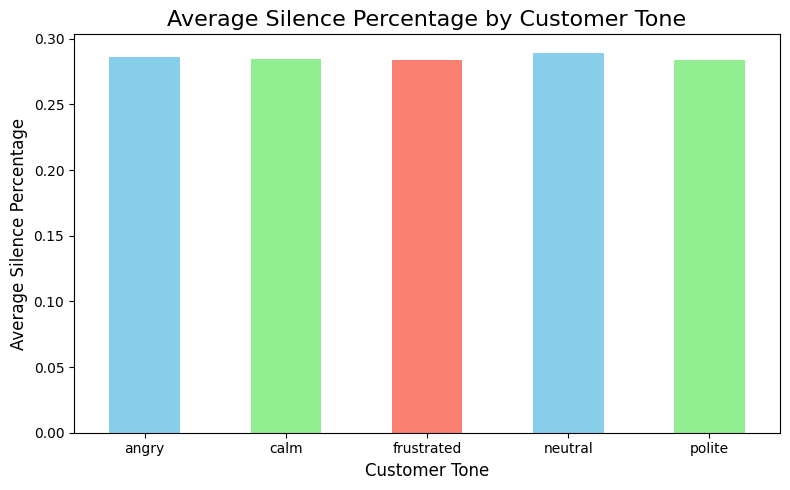

In [32]:
silence_average_by_customer_tone = main_dataset.groupby('customer_tone')['silence_percent_average'].mean()
print(silence_average_by_customer_tone)
plt.figure(figsize=(8, 5))
silence_average_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

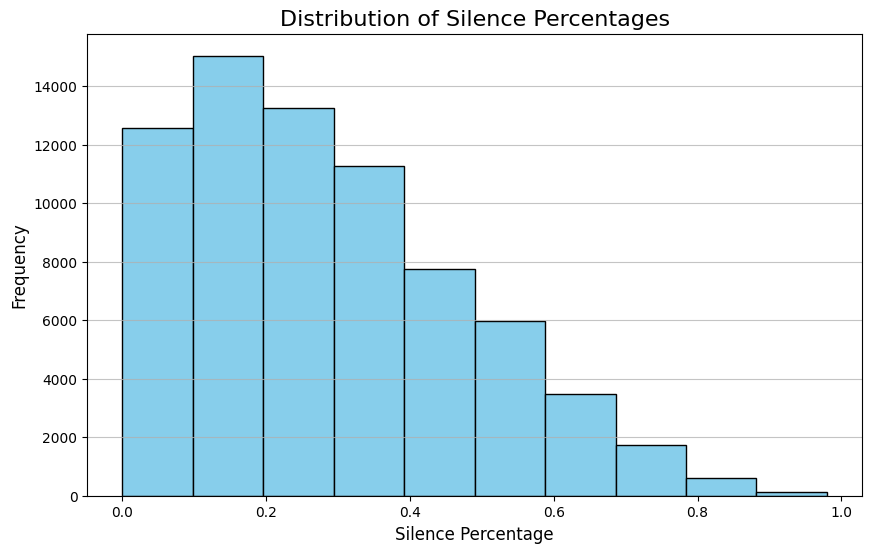

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(main_dataset['silence_percent_average'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Silence Percentages', fontsize=16)
plt.xlabel('Silence Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

agent_tone
angry         0.190077
calm          0.291409
frustrated    0.251336
neutral       0.285983
polite        0.256552
Name: silence_percent_average, dtype: float64


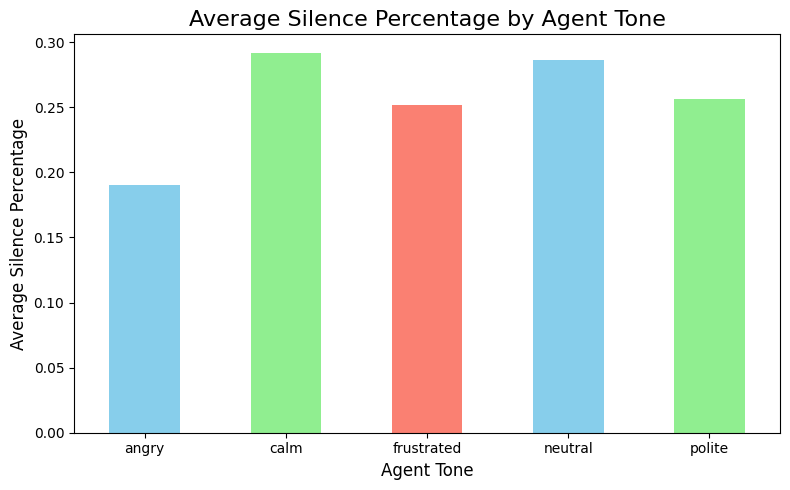

In [34]:
silence_average_by_agent_tone = main_dataset.groupby('agent_tone')['silence_percent_average'].mean()
print(silence_average_by_agent_tone)
plt.figure(figsize=(8, 5))
silence_average_by_agent_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Agent Tone', fontsize=16)
plt.xlabel('Agent Tone', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

primary_call_reason
baggage                  0.250508
booking                  0.260948
check in                 0.264857
check-in                 0.262199
checkout                 0.292309
communications           0.303578
digital support          0.285298
disability               0.248635
etc                      0.287563
irrops                   0.309404
mileage plus             0.275038
other topics             0.272726
post flight              0.296810
post-flight              0.297897
products & services      0.274622
products and services    0.277115
schedule change          0.267223
seating                  0.264613
traveler updates         0.284717
unaccompanied minor      0.242500
unknown reason           0.286411
upgrade                  0.277023
voluntary cancel         0.281767
voluntary change         0.289599
Name: silence_percent_average, dtype: float64


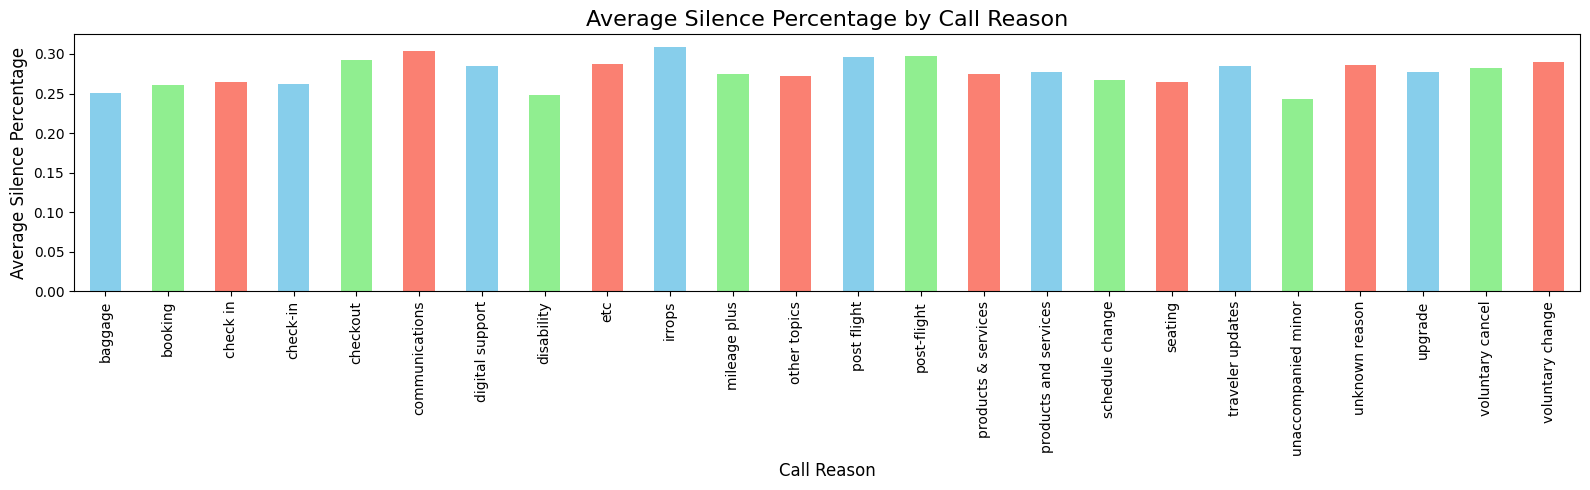

In [35]:
silence_average_by_call_reason = main_dataset.groupby('primary_call_reason')['silence_percent_average'].mean()
print(silence_average_by_call_reason)
plt.figure(figsize=(16, 5))
silence_average_by_call_reason.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Call Reason', fontsize=16)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
# Create a time index for every second an agent is on a call
time_ranges = []

for index, row in main_dataset.iterrows():
    time_range = pd.date_range(start=row['agent_assigned_datetime'], end=row['call_end_datetime'], freq='S')
    time_ranges.append(time_range)

# Concatenate all time ranges into one long Series
all_times = pd.concat([pd.Series(times) for times in time_ranges])

# Count how many agents are active at each second
active_agents_per_second = all_times.value_counts()

# Calculate the average number of agents on call per second
average_agents = active_agents_per_second.mean()

print(f"Average number of agents on call at any given second: {average_agents}")

Average number of agents on call at any given second: 18.836792096545995


In [37]:
tone_score_mapping = {
    'angry': 1,
    'frustrated': 2,
    'neutral': 3,
    'calm': 4,
    'polite': 5
}

main_dataset['agent_tone_score']= main_dataset['agent_tone'].map(tone_score_mapping)
main_dataset['customer_tone_score'] = main_dataset['customer_tone'].map(tone_score_mapping)

In [38]:
total_calls_per_agent = main_dataset.groupby('agent_id_x').agg(
    total_calls=('call_id', 'size'),
    avg_tone_rating=('agent_tone_score', 'mean')
).reset_index()
total_calls_per_agent

,agent_id_x,total_calls,avg_tone_rating
0,102574,2,3.500000
1,103651,298,3.278523
2,106000,113,3.292035
3,107876,6,3.166667
4,112609,11,3.454545
...,...,...,...
378,981776,309,3.288026
379,981779,227,3.246696
380,982131,270,3.240741
381,992521,46,3.195652


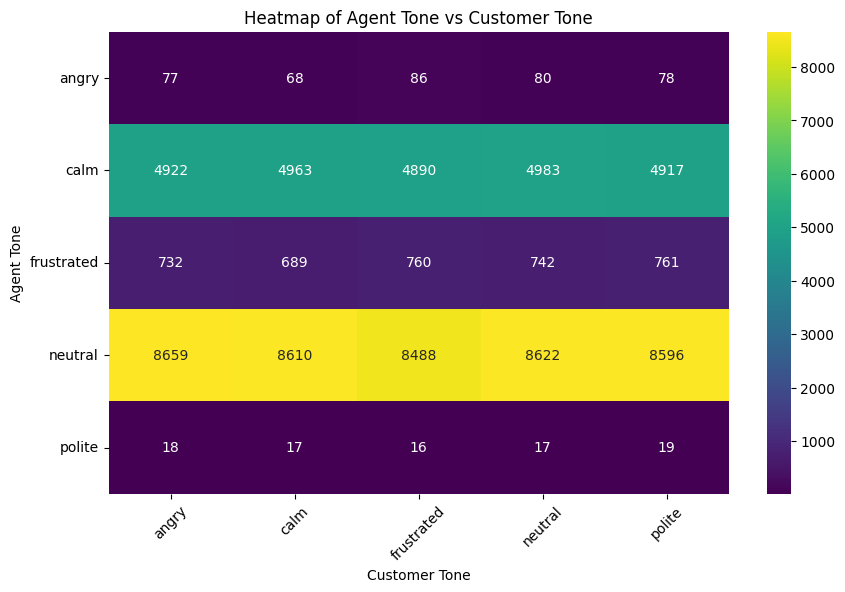

In [39]:
contingency_table = pd.crosstab(main_dataset['agent_tone'], main_dataset['customer_tone'])
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Agent Tone vs Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)   
plt.show()

In [40]:
agent_tone=main_dataset.groupby('agent_tone').size()
customer_tone= main_dataset.groupby('customer_tone').size()
print(agent_tone)
print("--------------------")
print(customer_tone)

agent_tone
angry           389
calm          24675
frustrated     3684
neutral       42975
polite           87
dtype: int64
--------------------
customer_tone
angry         14408
calm          14347
frustrated    14240
neutral       14444
polite        14371
dtype: int64


In [41]:
agent_stats = main_dataset.groupby('agent_id_x').agg(
    avg_handle_time=('handle_time', 'mean'),  # Average handling time
    avg_silence_percentage=('silence_percent_average', 'mean'),  # Average silence percentage
    avg_call_sentiment_score= ('average_sentiment','mean')
).reset_index()
agent_data=pd.merge(total_calls_per_agent,agent_stats,on='agent_id_x')
agent_data

,agent_id_x,total_calls,avg_tone_rating,avg_handle_time,avg_silence_percentage,avg_call_sentiment_score
0,102574,2,3.500000,3600.000000,0.260000,-0.075000
1,103651,298,3.278523,747.382550,0.293389,-0.027953
2,106000,113,3.292035,689.203540,0.274956,-0.032124
3,107876,6,3.166667,990.000000,0.405000,-0.065000
4,112609,11,3.454545,850.909091,0.286364,-0.020909
...,...,...,...,...,...,...
378,981776,309,3.288026,703.106796,0.284725,-0.026861
379,981779,227,3.246696,683.788546,0.301057,-0.034714
380,982131,270,3.240741,722.222222,0.276630,-0.038815
381,992521,46,3.195652,949.565217,0.293043,-0.016957


In [42]:
# Calculate the length of each call transcript
main_dataset['transcript_length'] = main_dataset['call_transcript'].fillna('').apply(len)

# Display the first few rows with the new column
print(main_dataset[['call_transcript', 'transcript_length']].head())

# %% [code]
# Basic statistics of transcript lengths
transcript_length_stats = main_dataset['transcript_length'].describe()
print(transcript_length_stats)

                                     call_transcript  transcript_length
0  \n\nAgent: Thank you for calling United Airlin...               2296
1  \n\nAgent: Thank you for calling United Airlin...               2680
2  \n\nAgent: Thank you for calling United Airlin...               3128
3  \n\nAgent: Thank you for calling United Airlin...               3289
4  \n\nAgent: Thank you for calling United Airlin...               2820
count    71810.000000
mean      2781.781437
std        577.620382
min        214.000000
25%       2361.000000
50%       2714.000000
75%       3136.000000
max       4857.000000
Name: transcript_length, dtype: float64


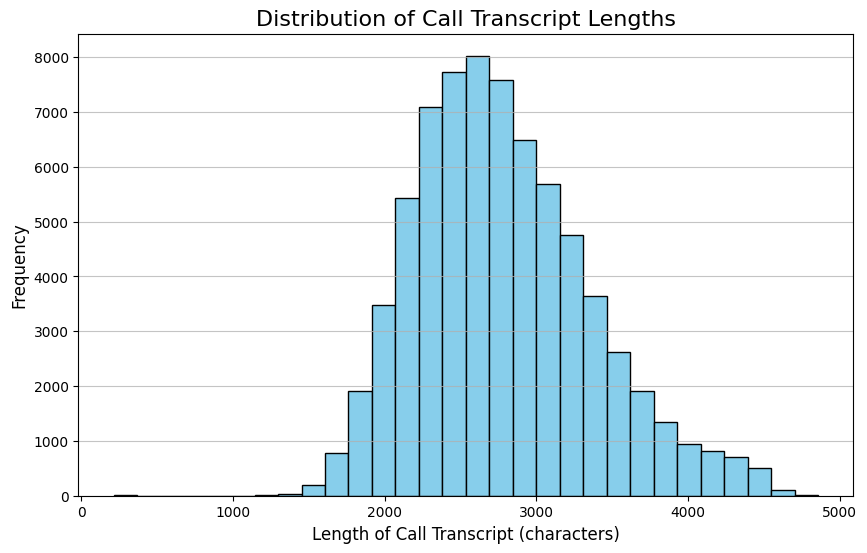

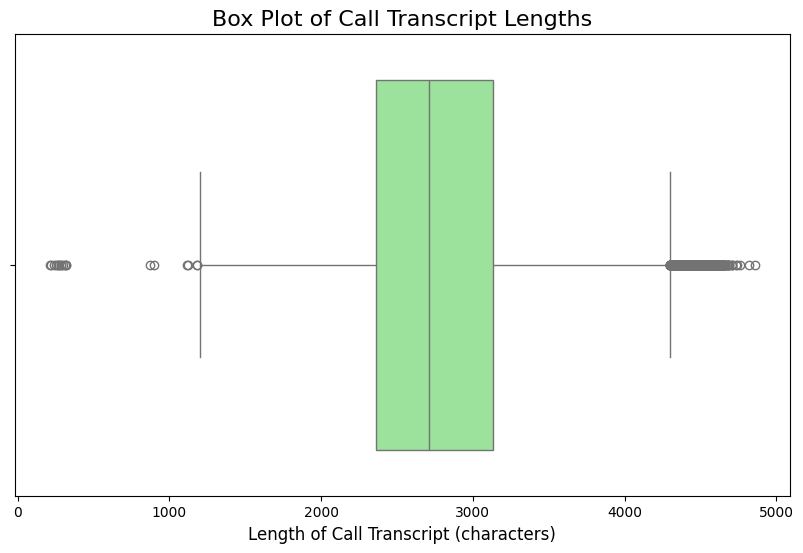

In [43]:
# Visualizing the distribution of call transcript lengths using a histogram
plt.figure(figsize=(10, 6))
plt.hist(main_dataset['transcript_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Call Transcript Lengths', fontsize=16)
plt.xlabel('Length of Call Transcript (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# %% [code]
# Optional: Create a box plot to visualize the spread of transcript lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x=main_dataset['transcript_length'], color='lightgreen')
plt.title('Box Plot of Call Transcript Lengths', fontsize=16)
plt.xlabel('Length of Call Transcript (characters)', fontsize=12)
plt.show()

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [45]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ramneek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ramneek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ramneek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ramneek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [46]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

In [47]:
main_dataset['cleaned_transcript'] = main_dataset['call_transcript'].fillna('').apply(preprocess_text)
print(main_dataset[['call_transcript', 'cleaned_transcript']].head())

                                     call_transcript  \
0  \n\nAgent: Thank you for calling United Airlin...   
1  \n\nAgent: Thank you for calling United Airlin...   
2  \n\nAgent: Thank you for calling United Airlin...   
3  \n\nAgent: Thank you for calling United Airlin...   
4  \n\nAgent: Thank you for calling United Airlin...   

                                  cleaned_transcript  
0  agent thank calling united airline customer se...  
1  agent thank calling united airline name sam he...  
2  agent thank calling united airline customer se...  
3  agent thank calling united airline customer se...  
4  agent thank calling united airline customer se...  


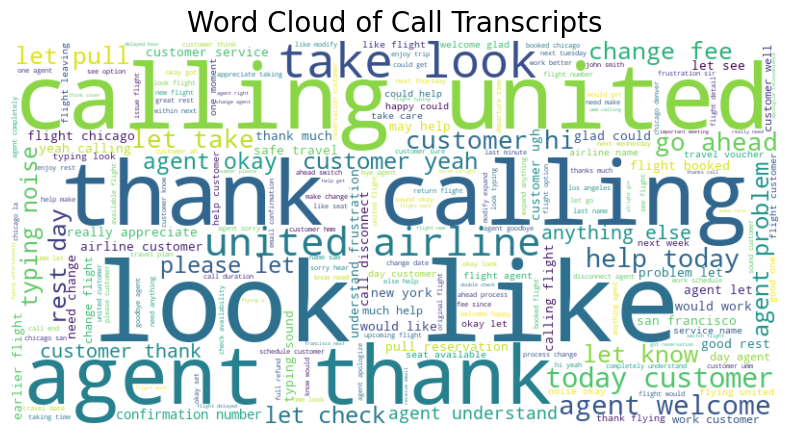

In [48]:
from wordcloud import WordCloud
all_transcripts = ' '.join(main_dataset['cleaned_transcript'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stop_words,
                      max_words=200,
                      colormap='viridis').generate(all_transcripts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Call Transcripts', fontsize=20)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
X = main_dataset['cleaned_transcript']
y = main_dataset['primary_call_reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [51]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf.transform(X_test)


In [52]:
# Initialize the model (Random Forest in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    1    0    0    0    0    0    0    0  373    7    0    0    1
     0    0    0    5    0    0    1    0    0  179]
 [   0    0    0    0    0    0    0    0    0  353    8    0    0    0
     0    0    0   11    0    0    1    0    0  154]
 [   0    0    0    0    0    0    0    0    0   54    0    0    0    0
     0    0    0    1    0    0    0    0    0   22]
 [   0    0    0    0    0    0    0    0    0  215    4    0    0    0
     0    0    0    3    0    0    0    0    0   82]
 [   0    0    0    0    0    1    0    0    0  286    2    0    0    0
     0    0    0    5    0    0    0    0    0   84]
 [   0    0    0    0    0    2    0    0    0  579    3    0    0    1
     0    0    0    7    0    0    4    0    0  172]
 [   0    1    0    0    0    0    0    0    0  177    3    0    0    0
     0    0    0    1    0    0    0    0    0   63]
 [   0    0    0    0    0    0    0    0    0   55    1    0    0    0
     0    0    0    3    0    0    0    0    0   22]


c:\Users\Ramneek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ramneek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

              baggage       0.00      0.00      0.00       567
              booking       0.00      0.00      0.00       527
             check in       0.00      0.00      0.00        77
             check-in       0.00      0.00      0.00       304
             checkout       0.00      0.00      0.00       378
       communications       0.25      0.00      0.01       768
      digital support       0.00      0.00      0.00       245
           disability       0.00      0.00      0.00        81
                  etc       0.00      0.00      0.00       190
               irrops       0.19      0.74      0.31      2662
         mileage plus       0.07      0.01      0.01      1170
         other topics       0.00      0.00      0.00       164
          post flight       0.00      0.00      0.00        75
          post-flight       0.11      0.00      0.00       791
  products & services       0.00      0.00      0.00  

c:\Users\Ramneek\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Sample new transcript
new_transcript = ["""

Agent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?

Customer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. 

Agent: I'm so sorry to hear about the delay, that's definitely frustrating. Umm, let me pull up your reservation and take a look at what happened. *typing sounds* Okay, it looks like there was severe weather in Chicago that caused multiple flight cancellations and delays across the board for all the airlines. Ahh shoot, yeah your original flight was scheduled to depart at 2pm but didn't actually take off until after 5pm.

Customer: Ugh this is such poor planning on United's part, you should have rerouted passengers or put us on other flights that weren't delayed. Now I've wasted a whole day. 

Agent: I understand your frustration sir, delays are never fun. Let me see what options I have available to help make this up to you. Hmm, it looks like I can get you booked on a flight leaving at 3pm tomorrow that will have you landing in New York by 5pm. I'll waive the change fee and provide you with a travel voucher for $200 to help cover expenses from the missed meetings today. Does that work for your schedule?

Customer: I guess that's better than nothing. But you really need to get your act together, this is unacceptable customer service from United. Your delays are costing people time and money. 

Agent: You're right, we want to do better for our customers. I apologize again for the delay and inconvenience. Thank you for flying with us and I hope the rescheduled flight and travel credit help make up for some of the trouble today. Please feel free to reach back out if you have any other issues. Thanks for your patience and for understanding - I appreciate you taking the time to work through this with me.

Customer: Alright fine. This better not happen again next time I fly United. 

Agent: I'll be sure to note your record so we can try and avoid any repeats going forward. Take care and have a good rest of your day.

Customer: Yeah, you too. *hangs up*

Agent: Thank you for your call, next caller please. *pretends to answer another call* Hi there, thank you for calling United how can I help?
"""]

# Preprocess and transform
new_transcript_cleaned = preprocess_text(new_transcript[0])
new_transcript_tfidf = tfidf.transform([new_transcript_cleaned])

# Predict call reason
predicted_reason = model.predict(new_transcript_tfidf)
print(f'Predicted Call Reason: {predicted_reason[0]}')

Predicted Call Reason: voluntary cancel


In [55]:
test_Id=pd.read_csv('dataset/test.csv')
test_Id.head()

,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168


In [56]:
test_Id_data= pd.merge(test_Id, main_dataset, on="call_id",how='left')
test_Id_data.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,...,primary_call_reason,customer_name,elite_level_code,handle_time,allocation_time,hour,agent_tone_score,customer_tone_score,transcript_length,cleaned_transcript
0,7732610078,488324,neutral,neutral,-0.06,0.58,4029953261,2024-08-01 00:23:00,2024-08-01 00:34:00,2024-08-01 01:32:00,...,unknown reason,Cassandra Flores,0.0,3480.0,660.0,0,3,3,2228,agent thank calling united airline customer se...
1,2400299738,963118,calm,angry,0.01,0.40,2034858976,2024-08-01 01:33:00,2024-08-01 01:41:00,2024-08-01 01:54:00,...,unknown reason,Hannah Drake,0.0,780.0,480.0,1,4,1,2446,agent thank calling united airline name adam h...
2,6533095063,519057,neutral,calm,0.00,0.49,1874845993,2024-08-01 02:17:00,2024-08-01 02:27:00,2024-08-01 02:29:00,...,unknown reason,Larry Nolan,0.0,120.0,600.0,2,3,4,2560,agent thank calling united airline customer se...
3,7774450920,963118,calm,angry,0.02,0.28,2633426588,2024-08-01 02:49:00,2024-08-01 02:53:00,2024-08-01 02:57:00,...,unknown reason,Shelby Wright,0.0,240.0,240.0,2,4,1,2841,agent thank calling united airline david help ...
4,9214147168,158319,neutral,frustrated,-0.12,0.12,8334856492,2024-08-01 02:49:00,2024-08-01 02:55:00,2024-08-01 02:59:00,...,unknown reason,Mr. Thomas Simmons,3.0,240.0,360.0,2,3,2,3590,agent thank calling united airline customer se...


In [57]:
X_model2 = main_dataset[['handle_time', 'agent_tone_score', 'customer_tone_score', 'average_sentiment', 'silence_percent_average']]
y_model2 = main_dataset['primary_call_reason']

X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42)

In [58]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_model2, y_train_model2)

# Predict on test data
y_pred_model2 = rf_model.predict(X_test_model2)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test_model2, y_pred_model2))

# Confusion matrix for detailed error analysis
print("Confusion Matrix:")
print(confusion_matrix(y_test_model2, y_pred_model2))

# Accuracy Score
accuracy_model2 = accuracy_score(y_test_model2, y_pred_model2)
print(f'Accuracy: {accuracy_model2}')

# F1 Score (weighted, as you are likely dealing with class imbalance)
f1_model2 = f1_score(y_test_model2, y_pred_model2, average='weighted')
print(f'F1 Score (Weighted): {f1_model2}')

# We will only use model_1 based on call_transcripts to find the primary_reason

Classification Report:
                       precision    recall  f1-score   support

              baggage       0.10      0.11      0.10       532
              booking       0.07      0.06      0.06       488
             check in       0.02      0.01      0.02        73
             check-in       0.01      0.01      0.01       318
             checkout       0.05      0.04      0.04       366
       communications       0.09      0.07      0.08       807
      digital support       0.02      0.02      0.02       236
           disability       0.04      0.03      0.03        80
                  etc       0.03      0.02      0.02       177
               irrops       0.23      0.33      0.27      2659
         mileage plus       0.12      0.12      0.12      1190
         other topics       0.02      0.02      0.02       166
          post flight       0.00      0.00      0.00        62
          post-flight       0.08      0.07      0.07       767
  products & services       0.0

In [60]:
X_test= test_Id_data['cleaned_transcript']
X_tfidf = tfidf.transform(X_test)
predictions = model.predict(X_tfidf)

# Create a DataFrame to store the call_id and corresponding predicted reason
output_df = pd.DataFrame({
    'call_id': test_Id['call_id'],
    'primary_call_reasons': predictions
})

output_df.to_csv('dataset/test_Code Turbulence.csv',index=False)


In [61]:
test_data_model2 = test_Id_data[['handle_time', 'agent_tone_score', 'customer_tone_score', 'average_sentiment', 'silence_percent_average']]
predictions_model2=rf_model.predict(test_data_model2)

# Create a DataFrame to store the call_id and corresponding predicted reason
output_df_model2 = pd.DataFrame({
    'call_id': test_Id['call_id'],
    'primary_call_reasons': predictions_model2
})

output_df.to_csv('dataset/test_model_2.csv',index=False)

C:\Users\Ramneek\AppData\Local\Temp\ipykernel_18936\3600601144.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_importance_df, x='Importance', y='Feature', palette='viridis')


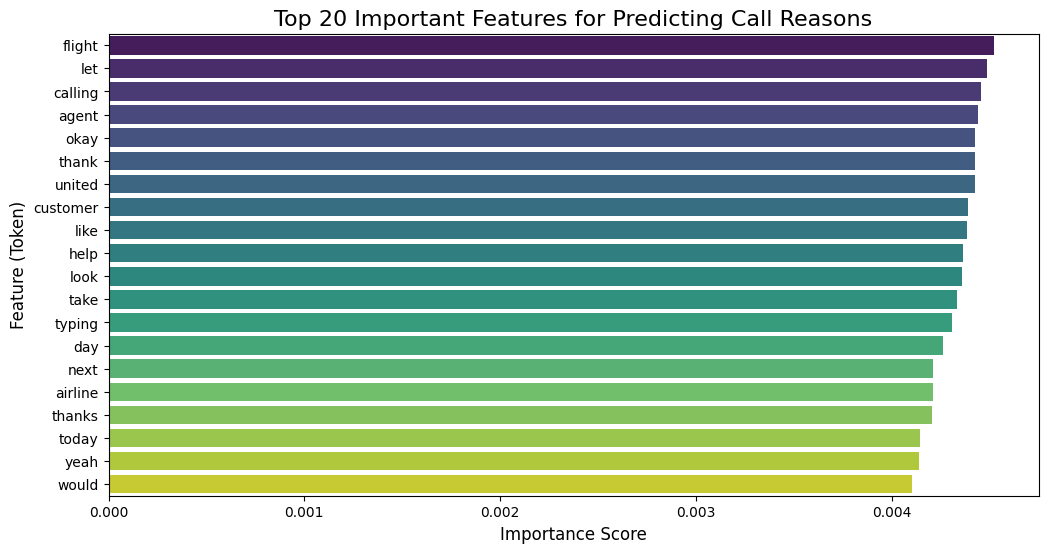

In [62]:
# Step 1: Extract feature importances
feature_importances = model.feature_importances_

# Step 2: Get feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Step 3: Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Step 4: Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 5: Select the top 20 features for visualization
top_n = 20
top_importance_df = importance_df.head(top_n)

# Step 6: Visualize the top features
plt.figure(figsize=(12, 6))
sns.barplot(data=top_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Important Features for Predicting Call Reasons', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature (Token)', fontsize=12)
plt.show()

            Term  Frequency
265165    flight     688612
57518      agent     556430
191478  customer     555183
370507       let     310962
141136    change     273756
383403      look     221904
310700      help     207541
373206      like     194108
616847     thank     184723
664840    united     173090
199853       day     161667
128328   calling     159961
444130      okay     156933
648600    typing     155008
694716      work     154477
418996      need     130873
638961    travel     130078
625735      time     128699
704863      yeah     123142
508758    really     119978


C:\Users\Ramneek\AppData\Local\Temp\ipykernel_18936\4236334764.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=term_frequency_df.head(20), x='Frequency', y='Term', palette='viridis')


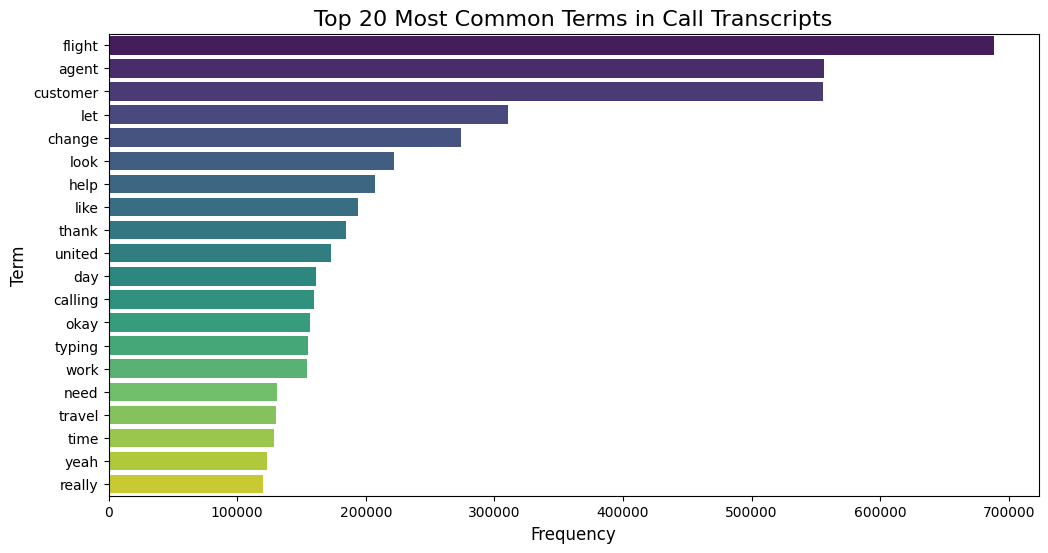

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer to extract bigrams
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X_counts = count_vectorizer.fit_transform(main_dataset['cleaned_transcript'])

# Sum the occurrences of each term
term_frequency = X_counts.sum(axis=0)

# Create a DataFrame for bigram frequencies
term_frequency_df = pd.DataFrame(term_frequency, columns=count_vectorizer.get_feature_names_out())
term_frequency_df = term_frequency_df.T.reset_index()
term_frequency_df.columns = ['Term', 'Frequency']
term_frequency_df = term_frequency_df.sort_values(by='Frequency', ascending=False)

# Display the top 20 common bigrams
print(term_frequency_df.head(20))

# Visualize the top bigrams
plt.figure(figsize=(12, 6))
sns.barplot(data=term_frequency_df.head(20), x='Frequency', y='Term', palette='viridis')
plt.title('Top 20 Most Common Terms in Call Transcripts', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Term', fontsize=12)
plt.show()

In [64]:
# main_dataset.drop('silence_average_by_call_reason', axis=1, inplace=True)
silence_average_by_call_reason
data = {
    'primary_call_reason': [
        'baggage', 'booking', 'check in', 'check-in', 'checkout', 
        'communications', 'digital support', 'disability', 'etc', 
        'irrops', 'mileage plus', 'other topics', 'post flight', 
        'post-flight', 'products & services', 'products and services', 
        'schedule change', 'seating', 'traveler updates', 
        'unaccompanied minor', 'unknown reason', 'upgrade', 
        'voluntary cancel', 'voluntary change'
    ],
    'probability': [
        0.250508, 0.260948, 0.264857, 0.262199, 0.292309, 
        0.303578, 0.285298, 0.248635, 0.287563, 
        0.309404, 0.275038, 0.272726, 0.296810, 
        0.297897, 0.274622, 0.277115, 0.267223, 
        0.264613, 0.284717, 0.242500, 0.286411, 
        0.277023, 0.281767, 0.289599
    ]
}

probabilities_df = pd.DataFrame(data)
main_dataset = pd.merge(main_dataset, probabilities_df, on='primary_call_reason', how='left')
main_dataset.rename(columns={'probability': 'silence_average_by_call_reason'}, inplace=True)
main_dataset.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,...,customer_name,elite_level_code,handle_time,allocation_time,hour,agent_tone_score,customer_tone_score,transcript_length,cleaned_transcript,silence_average_by_call_reason
0,4667960400,963118,neutral,angry,-0.04,0.39,2033123310,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,...,Matthew Foster,4.0,1860.0,420.0,23,3,1,2296,agent thank calling united airline customer se...,0.281767
1,1122072124,519057,calm,neutral,0.02,0.35,8186702651,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,...,Tammy Walters,0.0,720.0,180.0,0,4,3,2680,agent thank calling united airline name sam he...,0.260948
2,6834291559,158319,neutral,polite,-0.13,0.32,2416856629,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,...,Jeffery Dixon,0.0,1140.0,480.0,23,3,5,3128,agent thank calling united airline customer se...,0.309404
3,2266439882,488324,neutral,frustrated,-0.20,0.20,1154544516,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,...,David Wilkins,2.0,420.0,300.0,0,3,2,3289,agent thank calling united airline customer se...,0.277023
4,1211603231,721730,neutral,polite,-0.05,0.35,5214456437,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,...,Elizabeth Daniels,0.0,540.0,600.0,0,3,5,2820,agent thank calling united airline customer se...,0.264613


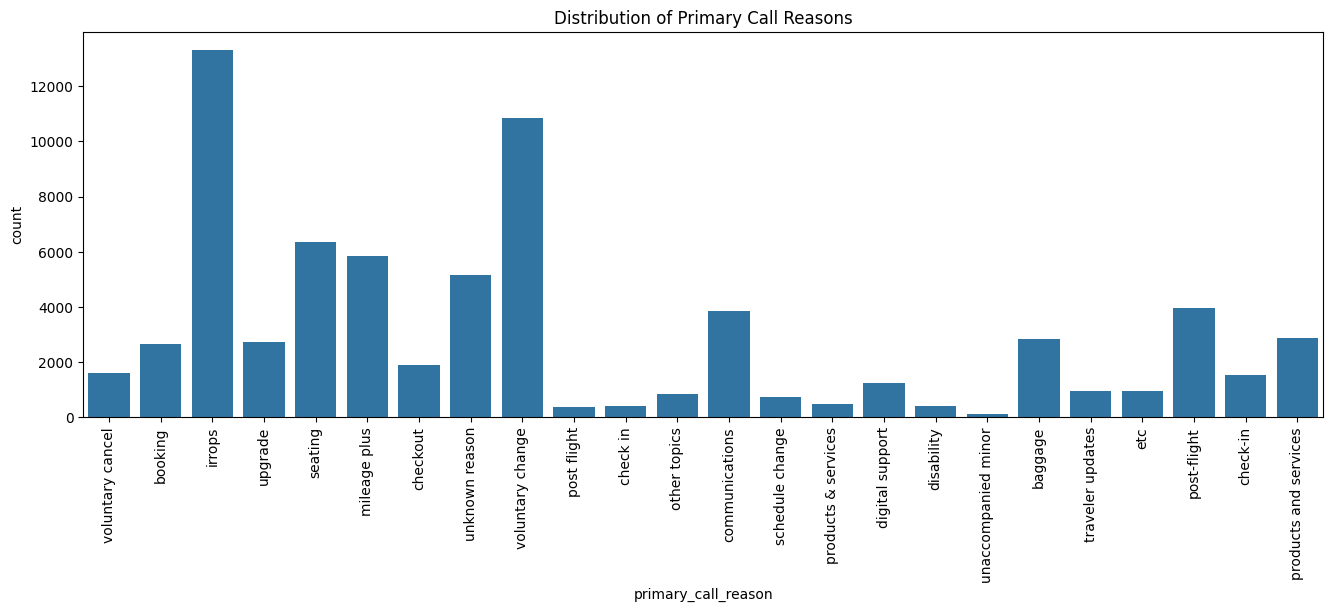

In [65]:
# Visualization example for categorical features
plt.figure(figsize=(16, 5))
sns.countplot(data=main_dataset, x='primary_call_reason')
plt.title('Distribution of Primary Call Reasons')
plt.xticks(rotation=90)
plt.show()

In [66]:
customer_data = main_dataset.groupby('customer_id').agg(
    avg_handle_time=('handle_time', 'mean'),  # Average handling time,
    avg_customer_tone= ('customer_tone_score','mean')
).reset_index()
customer_data

,customer_id,avg_handle_time,avg_customer_tone
0,11978,60.0,3.0
1,443070,300.0,1.0
2,474941,420.0,4.0
3,476994,300.0,5.0
4,752705,240.0,5.0
...,...,...,...
71805,9999462506,180.0,5.0
71806,9999606019,120.0,4.0
71807,9999669080,120.0,5.0
71808,9999900870,60.0,4.0


Analyze key identifiers for long AHT, and AST during peak high volume periods

In [67]:
# Filter for calls within the peak hours of 9 AM to 5 PM
peak_start_time = pd.to_datetime('09:00').time()
peak_end_time = pd.to_datetime('18:00').time()

In [68]:
# Filter the DataFrame for calls during peak hours
main_dataset['call_time'] = main_dataset['call_start_datetime'].dt.time
peak_calls = main_dataset[(main_dataset['call_time'] >= peak_start_time) & (main_dataset['call_time'] <= peak_end_time)]

In [69]:
# 1. Average AHT during peak hours
average_aht_peak = peak_calls['handle_time'].mean()
print(f"Average AHT during peak hours (9 AM to 5 PM): {average_aht_peak:.2f} seconds")

Average AHT during peak hours (9 AM to 5 PM): 694.70 seconds


In [70]:
# Analyzing Call Reasons
call_reason_stats = peak_calls.groupby('primary_call_reason').agg({'handle_time': 'mean', 'call_id': 'count'}).reset_index()
call_reason_stats.columns = ['primary_call_reason', 'handle_time', 'call_count']

# Find the most and least frequent reasons
most_frequent_reason = call_reason_stats.loc[call_reason_stats['call_count'].idxmax()]
least_frequent_reason = call_reason_stats.loc[call_reason_stats['call_count'].idxmin()]

# Print results
print(f"\nMost Frequent Call Reason: {most_frequent_reason['primary_call_reason']} with Average AHT: {most_frequent_reason['handle_time']:.2f} seconds")
print(f"Least Frequent Call Reason: {least_frequent_reason['primary_call_reason']} with Average AHT: {least_frequent_reason['handle_time']:.2f} seconds")



Most Frequent Call Reason: irrops with Average AHT: 782.96 seconds
Least Frequent Call Reason: unaccompanied minor with Average AHT: 510.45 seconds


In [71]:
# Identify most and least frequent call reasons
most_frequent_reason = call_reason_stats.loc[call_reason_stats['call_count'].idxmax()]
least_frequent_reason = call_reason_stats.loc[call_reason_stats['call_count'].idxmin()]
print(most_frequent_reason)
print(least_frequent_reason)

primary_call_reason        irrops
handle_time            782.956681
call_count                   8726
Name: 9, dtype: object
primary_call_reason    unaccompanied minor
handle_time                     510.447761
call_count                              67
Name: 19, dtype: object


In [72]:
# 3. Percentage difference in AHT between most and least frequent reasons
percentage_difference_aht = ((most_frequent_reason['handle_time'] - least_frequent_reason['handle_time']) / least_frequent_reason['handle_time']) * 100
print(f"\nPercentage Difference in AHT between Most and Least Frequent Call Reasons: {percentage_difference_aht:.2f}%")

# 4. Sentiment and Silence Analysis
sentiment_analysis = peak_calls[['average_sentiment', 'silence_percent_average', 'handle_time']]
print("\nSentiment and Silence Analysis during Peak Calls:")
print(sentiment_analysis.describe())


Percentage Difference in AHT between Most and Least Frequent Call Reasons: 53.39%

Sentiment and Silence Analysis during Peak Calls:
       average_sentiment  silence_percent_average   handle_time
count        47179.00000             47179.000000  47179.000000
mean            -0.03369                 0.285026    694.703576
std              0.14368                 0.192069    769.715051
min             -1.38000                 0.000000      0.000000
25%             -0.11000                 0.130000    240.000000
50%             -0.02000                 0.250000    420.000000
75%              0.05000                 0.410000    900.000000
max              1.38000                 0.980000   7140.000000


In [73]:
import pickle
pickle.dump(main_dataset,open('dataset/main_dataset.pkl','wb'))
pickle.dump(main_dataset,open('dataset/customer_data.pkl','wb'))
pickle.dump(agent_data,open('dataset/agent_data.pkl','wb'))
